In [2]:
w1 = np.array([0, 0, 1])
q1 = np.array([0, 0, 0])
v1 = -np.cross(w1, q1)

w2 = np.array([1, 0, 0])
q2 = np.array([0, 0, L1])
v2 = -np.cross(w2, q2)

w3 = np.array([1, 0, 0])
q3 = np.array([0, L2, L1])
v3 = -np.cross(w3, q3)

# Store screw axes in 6x3 matrix
Slist = np.column_stack((
    np.hstack((w1, v1)),
    np.hstack((w2, v2)),
    np.hstack((w3, v3))
))
Slist

array([[ 0,  1,  1],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  6,  6],
       [ 0,  0, -7]])

In [103]:
import numpy as np


L1 = 6
L2 = 7  # Length of the second link
L3 = 7
# Define joint axes and locations
w1 = np.array([0, 0, 1])
q1 = np.array([0, 0, 0])
v1 = -np.cross(w1, q1)

w2 = np.array([0, -1, 0])
q2 = np.array([0, 0, L1])
v2 = -np.cross(w2, q2)

w3 = np.array([0, 1, 0])
q3 = np.array([L2, 0, L1])
v3 = -np.cross(w3, q3)

# Screw axes (6x3 matrix)
S1 = np.hstack((w1, v1))  # shape (6,)
S2 = np.hstack((w2, v2))
S3 = np.hstack((w3, v3))
Slist = np.column_stack((S1, S2, S3))  # shape (6,3)



Slist.shape

(6, 3)

In [82]:
M = np.array([
            [1, 0, 0, L2+L3],
            [0, 1, 0, 0],
            [0, 0, 1, L1],
            [0, 0, 0, 1]
        ])
import modern_robotics as mr
import math
mr.FKinSpace(M, Slist, [1.6231562, 1.6231562 ,1.6231562])


array([[-0.05233595, -0.99862953,  0.        , -0.3471783 ],
       [ 0.99862953, -0.05233595,  0.        ,  6.62455715],
       [ 0.        ,  0.        ,  1.        , 12.99040674],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [83]:
mr.FKinSpace(M, Slist, [ 0.86399238, -0.18526706 , 1.56971362])

array([[-0.11893542, -0.76044129,  0.63842259,  3.63550616],
       [-0.13927083,  0.64940668,  0.74757916,  4.25709974],
       [-0.98308596,  0.        , -0.18314474, -2.17106492],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [84]:
mr.FKinSpace(M, Slist, [math.radians(0),math.radians(0),math.radians(0)])

array([[ 1.,  0.,  0., 14.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  6.],
       [ 0.,  0.,  0.,  1.]])

In [7]:
np.deg2rad([90, 90, 0]) 

array([1.57079633, 1.57079633, 0.        ])

In [85]:

mr.FKinSpace(M, Slist, [1.57079633, 1.5849691 , 0.01423307])[0:3,3]

array([ 3.16612989e-10, -9.87840136e-02,  1.99992970e+01])

In [86]:
T[0:3,3]

array([ 7. , -0.2, 13. ])

In [87]:
math.radians(90), math.radians(93)

(1.5707963267948966, 1.6231562043547265)

In [107]:
T = np.array([[ 1,  0,  0, 14],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  6],
       [ 0,  0,  0,  1]], dtype=float)

direction_map = {
            0: np.array([+1, 0, 0]),
            1: np.array([0, +1, 0]),
            2: np.array([0, 0, +1]),
            3: np.array([-1, 0, 0]),
            4: np.array([0, -1, 0]),
            5: np.array([0, 0, -1]),
            6: np.array([0, 0, 0])
        }


T[0:3 , 3] += direction_map[4] * 0.2

# direction_map = {
#             0: np.array([+1, 0, 0]),
#             1: np.array([0, +1, 0]),
#             2: np.array([0, 0, +1]),
#             3: np.array([-1, 0, 0]),
#             4: np.array([0, -1, 0]),
#             5: np.array([0, 0, -1]),
#             6: np.array([0, 0, 0])
#         }


T

array([[ 1. ,  0. ,  0. , 14. ],
       [ 0. ,  1. ,  0. , -0.2],
       [ 0. ,  0. ,  1. ,  6. ],
       [ 0. ,  0. ,  0. ,  1. ]])

In [108]:
M

array([[ 1,  0,  0, 14],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  6],
       [ 0,  0,  0,  1]])

In [109]:
thetas, success = mr.IKinSpace(Slist, M, T, [math.radians(0),math.radians(0),math.radians(0)], eomg = 1e9, ev= 1e-1)
thetas, success

(array([0., 0., 0.]), False)

In [ ]:
mr.FKinSpace(M, Slist, [1.6231562, 1.6231562 ,1.6231562])

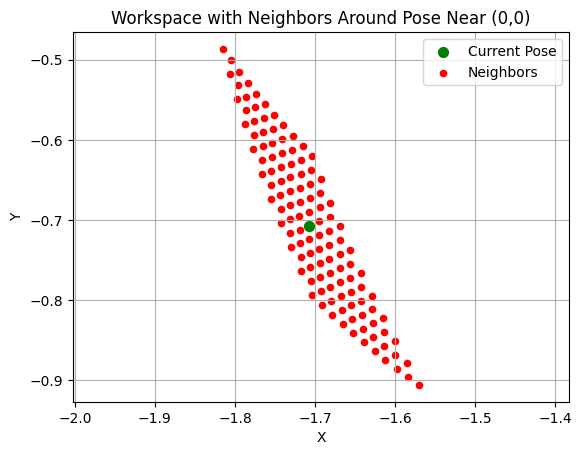

In [ ]:
import modern_robotics as mr
import numpy as np
import matplotlib.pyplot as plt

# Robot parameters
L1 = 1.0
L2 = 1.0

S1 = [0, 0, 1, 0, 0, 0]
S2 = [0, 0, 1, 0, -L1, 0]
S = np.array([S1, S2]).T

M = np.array([
    [1, 0, 0, L1 + L2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# 1. Compute the full workspace
theta1_range = np.linspace(0, np.pi, 100)
theta2_range = np.linspace(0, np.pi, 100)
workspace_points = []

for t1 in theta1_range:
    for t2 in theta2_range:
        theta = [t1, t2]
        T = mr.FKinSpace(M, S, theta)
        x, y = T[0, 3], T[1, 3]
        workspace_points.append((x, y))

workspace_points = np.array(workspace_points)
workspace_points = np.unique(workspace_points, axis=0)

# 2. Pick a point near (0, 0)
# Let's try a folded arm config: theta = [np.pi/2, -np.pi/2]
theta_current = [np.pi, np.pi/4]
T_current = mr.FKinSpace(M, S, theta_current)
x0, y0 = T_current[0, 3], T_current[1, 3]

# 3. Generate neighbor configurations
delta_deg = 5  # ±1 degree
neighbor_points = []
degrees = []
for d1_deg in range(-delta_deg, delta_deg + 1):
    for d2_deg in range(-delta_deg, delta_deg + 1):
        
        if d1_deg == 0 and d2_deg == 0:
            continue  # skip center
        d1 = np.radians(d1_deg)
        d2 = np.radians(d2_deg)
        theta_n = [theta_current[0] + d1, theta_current[1] + d2]
        degrees.append(theta_n)
        T_n = mr.FKinSpace(M, S, theta_n)
        x_n, y_n = T_n[0, 3], T_n[1, 3]
        neighbor_points.append((x_n, y_n))
degrees = np.array(degrees)
neighbor_points = np.array(neighbor_points)


# 4. Plot everything
plt.figure()
plt.scatter(x0, y0, c='green', s=50, label="Current Pose")
plt.scatter(neighbor_points[:, 0], neighbor_points[:, 1], c='red', s=20, label="Neighbors")
plt.title("Workspace with Neighbors Around Pose Near (0,0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()
x_test, y_test = neighbor_points[0]
degree = degrees[0]

T_desired = np.array([
    [1, 0, 0, x_test],
    [0, 1, 0, y_test],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])


theta_init = theta_current
epsilon = 1e-3
max_iter = 100

theta_sol, success = mr.IKinSpace(S, M, T_desired, theta_init, epsilon, max_iter)

theta_sol , degree


In [29]:
x_test, y_test = neighbor_points[0]
degree = degrees[0]

T_desired = np.array([
    [1, 0, 0, x_test],
    [0, 1, 0, y_test],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])


theta_init = theta_current
epsilon = 1e-3
max_iter = 100

theta_sol, success = mr.IKinSpace(S, M, T_desired, theta_init, epsilon, max_iter)

theta_sol , degree

(array([1.2403031, 5.0428822]), array([3.05432619, 0.6981317 ]))

In [ ]:
neighbor_theta_deg = np.array([175 , 40])
neighbor_theta_rad = np.radians(neighbor_theta_deg)

# Construct T_desired from FK of neighbor_theta
T_desired = mr.FKinSpace(M, S, neighbor_theta_rad)

# Use neighbor_theta_rad or theta_current as initial guess
theta_init = neighbor_theta_rad  # or theta_current

theta_sol, success = mr.IKinSpace(S, M, T_desired, theta_init, 1e-3, 100)

if success:
    print("IK solution (degrees):", np.rad2deg(theta_sol))
else:
    print("IK failed")


IK solution (degrees): [175.  40.]


In [19]:
np.radians(5)

np.float64(0.08726646259971647)

In [18]:
np.rad2deg([np.pi, np.pi/4])

array([180.,  45.])

In [12]:
np.rad2deg(theta_sol) , success

(array([ 71.06413315, 288.93586685]), True)

In [133]:
neighbor_points.shape

(8, 2)

In [134]:
neighbor_points

array([[0.7542393 , 1.6940492 ],
       [0.73679221, 1.69450607],
       [0.7193398 , 1.69465837],
       [0.72455919, 1.70695448],
       [0.68965437, 1.70695448],
       [0.69465837, 1.7193398 ],
       [0.67720596, 1.7191875 ],
       [0.65975887, 1.71873063]])

In [117]:
T = points[0]
T

array([-2.99951957e-32,  2.44929360e-16])

In [116]:
reachable_points = []

for t1 in theta1_range:
    for t2 in theta2_range:
        theta = [t1, t2]
        T = mr.FKinSpace(M, S, theta)
        pos = T[0:3, 3]
        R = np.eye(3)  # arbitrary rotation (e.g., identity)
        
        # Build target T matrix
        T_target = np.eye(4)
        T_target[0:3, 0:3] = R
        T_target[0:3, 3] = pos

        theta_guess = [0, 0]
        try:
            ik_sol, success = mr.IKinSpace(S, M, T_target, theta_guess, 1e-3, 1e-3)
            if success:
                reachable_points.append(pos[:2])  # just x and y
        except:
            continue


In [1]:
import modern_robotics as mr
import numpy as np
L1 = 1.0  # length of link 1
L2 = 1.0  # length of link 2

# Screw axes in space frame (for 2 revolute joints about z-axis)
S1 = [0, 0, 1, 0, 0, 0]         # Joint 1 at origin
S2 = [0, 0, 1, 0, -L1, 0]       # Joint 2 at (L1, 0, 0)

S = np.array([S1, S2]).T  # 6x2 matrix

# Home configuration of the end-effector (when both joints are at 0)
M = np.array([
    [1, 0, 0, L1 + L2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
theta = [np.pi/4, np.pi/4]  # joint angles

T = mr.FKinSpace(M, S, theta)
print("End-effector configuration:\n", T)# Desired end-effector transformation
# Modify the position (not the full SE(3) matrix yet!)
p = T[0:3, 3] + np.array([0, -0.1, -0.1])  # new desired position
R = T[0:3, 0:3]  # keep the same orientation

# Build the desired SE(3) matrix
T_desired = np.eye(4)
T_desired[0:3, 0:3] = R
T_desired[0:3, 3] = p

theta_guess = [0, 0]
thetalist_sol, success = mr.IKinSpace(S, M, T_desired, theta_guess, 1e-3, 1e-3)
print("IK Solution:", thetalist_sol)
print("Success:", success)



End-effector configuration:
 [[ 0.         -1.          0.          0.70710678]
 [ 1.          0.          0.          1.70710678]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
IK Solution: [0.70945337 0.86134295]
Success: False


np.int64(180)

In [30]:
# Instead of fixed identity rotation, get full pose from FK:
T_desired = mr.FKinSpace(M, S, degree)

theta_init = theta_current  # or degree for better guess
epsilon = 1e-3
max_iter = 100

theta_sol, success = mr.IKinSpace(S, M, T_desired, theta_init, epsilon, max_iter)

print("Target joint angles (degrees):", np.rad2deg(degree))
print("IK solution (degrees):", np.rad2deg(theta_sol))
print("Success:", success)


Target joint angles (degrees): [175.  40.]
IK solution (degrees): [175.  40.]
Success: True


In [32]:
T_desired[0,3] += 0.1

In [40]:

theta_init = theta_current  # or degree for better guess
eomg = 10000
ev = 0.1

theta_sol, success = mr.IKinSpace(S, M, T_desired, theta_init, eomg, ev)

print("Target joint angles (degrees):", np.rad2deg(degree))
print("IK solution (degrees):", np.rad2deg(theta_sol))
print("Success:", success)


Target joint angles (degrees): [175.  40.]
IK solution (degrees): [174.5  40.5]
Success: True


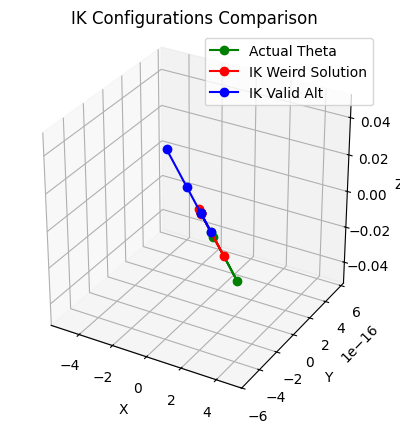

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modern_robotics import FKinSpace, MatrixExp6, VecTose3

def get_joint_positions(Slist, M, thetas):
    """
    Computes joint positions (x, y, z) along the chain.
    Returns: list of positions (each a 3D point)
    """
    T = np.eye(4)
    positions = [T[:3, 3]]  # start at origin
    for i in range(len(thetas)):
        exp = MatrixExp6(VecTose3(Slist[:, i] * thetas[i]))
        T = T @ exp
        positions.append((T @ np.eye(4))[:3, 3])
    T_end = T @ M
    positions.append(T_end[:3, 3])
    return np.array(positions)

def plot_robot(ax, joint_positions, color, label):
    xs, ys, zs = joint_positions[:, 0], joint_positions[:, 1], joint_positions[:, 2]
    ax.plot(xs, ys, zs, marker='o', color=color, label=label)

def visualize_all_configs(Slist, M, configs_deg):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for label, angles_deg, color in configs_deg:
        angles_rad = np.radians(angles_deg)
        joint_positions = get_joint_positions(Slist, M, angles_rad)
        plot_robot(ax, joint_positions, color=color, label=label)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("IK Configurations Comparison")
    ax.legend()
    ax.grid(True)
    ax.set_box_aspect([1, 1, 1])  # Equal aspect
    plt.show()

# --- Example usage:
actual_theta = [90, 78, 96]
ik1 = [90, -18, 96]
ik2 = [90, 78, -96]

# Add labels and colors
configs = [
    ("Actual Theta", actual_theta, 'green'),
    ("IK Weird Solution", ik1, 'red'),
    ("IK Valid Alt", ik2, 'blue')
]

# Your robot's screw axes and M matrix
# Example (replace with your actual values):
# S1: rotation about Z at origin
# S2, S3: rotation about Y with proper link offsets
L1, L2, L3 = 1, 1, 1
Slist = np.array([
    [0, 0, 0],  # wx
    [0, 1, 1],  # wy
    [1, 0, 0],  # wz
    [0, 0, 0],  # vx
    [0, -L1, -L1 - L2],  # vy
    [0, 0, 0]   # vz
]).astype(float)

M = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, L1 + L2 + L3],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Plot all configs
visualize_all_configs(Slist, M, configs)


In [11]:
def inverse_kinematics_3d( x, y, z, L1,L2, L3, x_offset= 0 , y_offset = 0  , z_offset = 0 ,  previous_thetas=None):
    """
    Calculates inverse kinematics for a 3DOF arm:
    - Joint 1 rotates around Z-axis
    - Joints 2 & 3 act in YZ plane
    Returns the solution closest to previous_thetas if provided.
    """
    # 1. θ1 = base rotation to reach (x, y)
    theta1 = np.arctan2(y, x)  # rotation around Z to reach y-axis

    # 2. Project the target onto the YZ plane by rotating into frame
    y_proj = np.sqrt(x**2 + y**2)- x_offset
    z_eff = z - L1  # offset for base height
    
    # 3. Compute r for planar arm (in YZ)

    r = np.sqrt(y_proj**2 + z_eff**2)

    # Check reachability
    if r > (L2 + L3) or r < abs(L2 - L3):
        raise ValueError("Target is out of reach")

    # 4. Two possible θ3 (elbow angle)
    cos_theta3 = (r**2 - L2**2 - L3**2) / (2 * L2 * L3)
    cos_theta3 = np.clip(cos_theta3, -1.0, 1.0)
    theta3_up =  np.arccos(cos_theta3)
    theta3_down = -theta3_up

    # 5. Corresponding θ2 (shoulder angle)
    k1_up = L2 + L3 * np.cos(theta3_up)
    k2_up = L3 * np.sin(theta3_up)
    theta2_up = np.arctan2(z_eff, y_proj) - np.arctan2(k2_up, k1_up)

    k1_down = L2 + L3 * np.cos(theta3_down)
    k2_down = L3 * np.sin(theta3_down)
    theta2_down = np.arctan2(z_eff, y_proj) - np.arctan2(k2_down, k1_down)

    # Pack solutions
    sol_up = np.array([theta1, theta2_up, theta3_up])
    sol_down = np.array([theta1, theta2_down, theta3_down])

    sol_up_deg = np.rad2deg(sol_up)
    sol_down_deg = np.rad2deg(sol_down)


    return sol_up_deg, sol_down_deg



In [12]:
import numpy as np
import modern_robotics as mr
def transform_to_signal(thetas):
    thetas_rounded = np.round(thetas).astype(int)
    thetas_rounded[2] += 90
    thetas_rounded[2] *= -1
    return thetas_rounded

L1=7.14
L2=7 
L3=8.34  
x_offset=0.9185 

w1 = np.array([0, 0, 1])
q1 = np.array([0, 0, 0])
v1 = -np.cross(w1, q1)

w2 = np.array([0, -1, 0])
q2 = np.array([x_offset, 0, L1])
v2 = -np.cross(w2, q2)

w3 = np.array([0, 1, 0])
q3 = np.array([L2+x_offset, 0, L1])
v3 = -np.cross(w3, q3)

# Screw axes (6x3 matrix)
S1 = np.hstack((w1, v1))  # shape (6,)
S2 = np.hstack((w2, v2))
S3 = np.hstack((w3, v3))
Slist = np.column_stack((S1, S2, S3))  # shape (6,3)

# Store home configuration
M = np.array([
    [1, 0, 0, L2+x_offset],
    [0, 1, 0, 0],
    [0, 0, 1, L1-L3],
    [0, 0, 0, 1]
])


def forward_kinematics( M , Slist ,thetas):
    return mr.FKinSpace(M, Slist, thetas)    
    

theta =[100 , 40,   0]

state = forward_kinematics(M, Slist , thetas= np.deg2rad(theta))



print("theta degree= " ,theta)
print(state[0:3,3])
# L1 = L2 = L3 = 1
# x_offset = 0.9185
# x = x_offset
# y = 0 
# z = 3
import numpy as np

thetas_up , theta_down = inverse_kinematics_3d(state[0,3],state[1,3],state[2,3],L1, L2 ,L3 , x_offset=x_offset)

print("result from inverse kinematics:" ,thetas_up, theta_down)

theta_up_signal = transform_to_signal(thetas_up)
theta_down_signal = transform_to_signal(theta_down)


print("singal for servo:" ,theta_up_signal , theta_down_signal)

theta degree=  [100, 40, 0]
[-2.021553   11.4647968   5.25070261]
result from inverse kinematics: [100.         -59.98460893  90.        ] [100.  40. -90.]
singal for servo: [ 100  -60 -180] [100  40   0]


In [13]:
Slist

array([[ 0.    ,  0.    ,  0.    ],
       [ 0.    , -1.    ,  1.    ],
       [ 1.    ,  0.    ,  0.    ],
       [ 0.    ,  7.14  , -7.14  ],
       [ 0.    , -0.    , -0.    ],
       [ 0.    , -0.9185,  7.9185]])

In [14]:
J = mr.JacobianSpace(Slist, np.deg2rad(theta))
J

array([[  0.        ,   0.98480775,  -0.98480775],
       [  0.        ,   0.17364818,  -0.17364818],
       [  1.        ,   0.        ,   0.        ],
       [  0.        ,  -1.23984799,   2.02118027],
       [  0.        ,   7.03152736, -11.46268291],
       [  0.        ,  -0.9185    ,   6.2808111 ]])

In [44]:
dtheta = np.array([0.01745, 0.01745, 0.01745])  # rad/s

V = J @ dtheta
omega = V[0:3]  # angular velocity of end-effector (rad/s)
v = np.abs(V[3:6])      # linear velocity of end-effector (units/sec)


In [45]:
V

array([ 0.        ,  0.        ,  0.01745   ,  0.01363425, -0.07732366,
        0.09357233])

In [46]:
v, omega

(array([0.01363425, 0.07732366, 0.09357233]),
 array([0.     , 0.     , 0.01745]))

In [74]:
theta =[101 , 40,   0]
state = forward_kinematics(M, Slist , thetas= np.deg2rad(theta))
print(state[0:3,3])
J = mr.JacobianSpace(Slist, np.deg2rad(theta))
V = J @ dtheta
omega = V[0:3]  # angular velocity of end-effector (rad/s)
v = np.abs(V[3:6])      # linear velocity of end-effector (units/sec)
print(v)


theta =[100 , 40,   0]
state = forward_kinematics(M, Slist , thetas= np.deg2rad(theta))
print(state[0:3,3])
J = mr.JacobianSpace(Slist, np.deg2rad(theta))
print(J)
V = J @ dtheta
omega = V[0:3]  # angular velocity of end-effector (rad/s)
v = np.abs(V[3:6])      # linear velocity of end-effector (units/sec)
print(v)

[-2.2213334  11.42776969  5.25070261]
[0.01498166 0.07707394 0.09357233]
[-2.021553   11.4647968   5.25070261]
[[  0.           0.98480775  -0.98480775]
 [  0.           0.17364818  -0.17364818]
 [  1.           0.           0.        ]
 [  0.          -1.23984799   2.02118027]
 [  0.           7.03152736 -11.46268291]
 [  0.          -0.9185       6.2808111 ]]
[0.01363425 0.07732366 0.09357233]


In [67]:

theta =[101 , 40,   0]
state = forward_kinematics(M, Slist , thetas= np.deg2rad(theta))
print(state[0:3,3])

J = mr.JacobianSpace(Slist, np.deg2rad(theta))

print(J)
V = J @ dtheta
omega = V[0:3]  # angular velocity of end-effector (rad/s)
v = np.abs(V[3:6])      # linear velocity of end-effector (units/sec)
print(v)

position = state[0:3,3]
print(position)
fut_position = position +  np.multiply(v , np.array([1, 0, 0]))

import numpy as np
print(fut_position)
thetas_up , theta_down = inverse_kinematics_3d(fut_position[0],fut_position[1],fut_position[2],L1, L2 ,L3 , x_offset=x_offset)

print("result from inverse kinematics:" ,thetas_up, theta_down)

theta_up_signal = transform_to_signal(thetas_up)
theta_down_signal = transform_to_signal(theta_down)


print("singal for servo:" ,theta_up_signal , theta_down_signal)

[-2.2213334  11.42776969  5.25070261]
[[  0.           0.98162718  -0.98162718]
 [  0.           0.190809    -0.190809  ]
 [  1.           0.           0.        ]
 [  0.          -1.36237623   2.22092383]
 [  0.           7.00881809 -11.42566263]
 [  0.          -0.9185       6.2808111 ]]
[0.01498166 0.07707394 0.09357233]
[-2.2213334  11.42776969  5.25070261]
[-2.20635175 11.42776969  5.25070261]
result from inverse kinematics: [100.927603   -60.00480241  90.02998254] [100.927603    40.01498888 -90.02998254]
singal for servo: [ 101  -60 -180] [101  40   0]


In [49]:
diff = theta - theta_down_signal
print("Difference in degrees:", diff)

Difference in degrees: [0 1 0]


In [92]:
delta_x = np.array([0.1, 0, 0])  # e.g., move 1cm in x
delta_theta = np.linalg.pinv(J[3:6]) @ delta_x  # only linear part

# Limit joint step size
max_joint_step = np.deg2rad(1.0)  # limit to 1 degree max
norm_dtheta = np.linalg.norm(delta_theta)

if norm_dtheta > max_joint_step:
    delta_theta = delta_theta / norm_dtheta * max_joint_step
delta_theta


array([ 0.        , -0.00319333, -0.00046699])

In [85]:
theta = [100 , 40, 0]

In [86]:
state = forward_kinematics(M, Slist , theta)

In [87]:
state

array([[-0.57511328,  0.50636564, -0.64252514,  2.12490661],
       [ 0.33771452,  0.86231887,  0.3772997 , -1.24777473],
       [ 0.74511316,  0.        , -0.66693806, 17.91805556],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [88]:
J = mr.JacobianSpace(Slist, np.deg2rad(theta))
J_linear = J[3:6, :]       # Linear part of Jacobian
J_x = J_linear[0, :]       # x-direction motion contribution

print("x-direction contribution per joint:")
for i in range(J_x.shape[0]):
    print(f"Joint {i+1}: {J_x[i]:.6f}")

theta += J_x


state = forward_kinematics(M, Slist , theta)


x-direction contribution per joint:
Joint 1: 0.000000
Joint 2: -1.239848
Joint 3: 2.021180


In [89]:
print(state)

[[ 0.49445814  0.50636564  0.70647363 -2.15448368]
 [-0.2903527   0.86231887 -0.41485115  1.2651428 ]
 [-0.81927191  0.          0.57340521  8.46784517]
 [ 0.          0.          0.          1.        ]]


In [98]:
print(theta)


delta_x = np.array([0.01, 0, 0])
delta_theta = np.linalg.pinv(J[3:6]) @ delta_x
print(delta_theta)


theta += delta_theta
T_before = forward_kinematics(M, Slist, theta)
position_before = T_before[0:3, 3]
print(position_before)
theta += delta_theta

T_after = forward_kinematics(M, Slist, theta)
position_after = T_after[0:3, 3]
print(position_after)
delta_pos = position_after - position_before
print("Actual Cartesian motion after delta_theta:", delta_pos)




[100.          38.72821876   2.01651038]
[ 0.00000000e+00 -3.19332512e-04 -4.66988909e-05]
[-2.09741682  1.23163234  8.5444549 ]
[-2.09684508  1.23129661  8.54519968]
Actual Cartesian motion after delta_theta: [ 0.00057173 -0.00033573  0.00074478]
